In [7]:
#import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np  
import math
import tkinter as tk
from tkinter import filedialog
from glob import glob
import os
import pandas as pd
from matplotlib import cm
from re import findall as find


In [2]:
# Create a Tkinter root object
root = tk.Tk()
root.withdraw()  # Hide the root window

# Launch a folder dialog box and store the selected folder path in a variable
folder_path = filedialog.askdirectory()

# Print the selected folder path
print(folder_path)

In [14]:
glob.glob(folder_path + "/*.csv")

['/Users/snaik/Documents/KeratinPaper/Figure1/KeratinExpression/NetworkDensity_ControlMO.csv']

In [18]:
denseDf

,,Area,Mean,Min,Max
0,1,2794.885,54.002,0,255
1,2,2794.885,99.814,0,255
2,3,2794.885,109.271,0,255
3,4,2794.885,205.076,0,255
4,5,2794.885,232.042,0,255
5,6,2794.885,252.653,0,255


<BarContainer object of 3 artists>

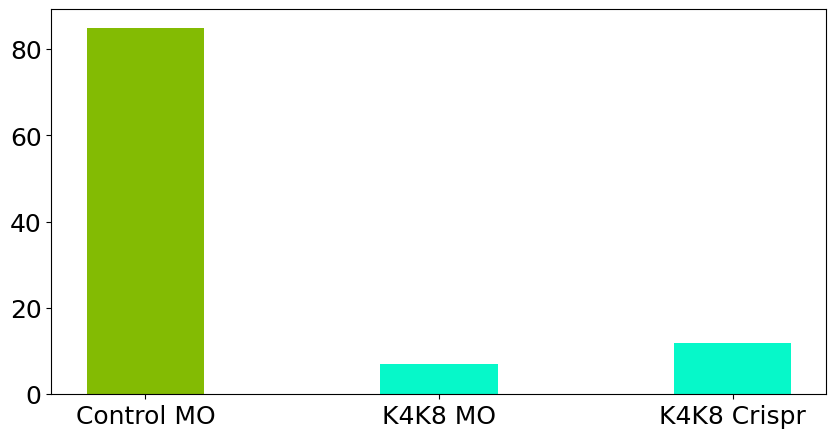

In [9]:
data={"Control MO":85,"K4K8 MO":7, "K4K8 Crispr":12}
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(list(data.keys()), list(data.values()), color =['#83bb03','#06f8c9','#06f8c9'],width = 0.4)

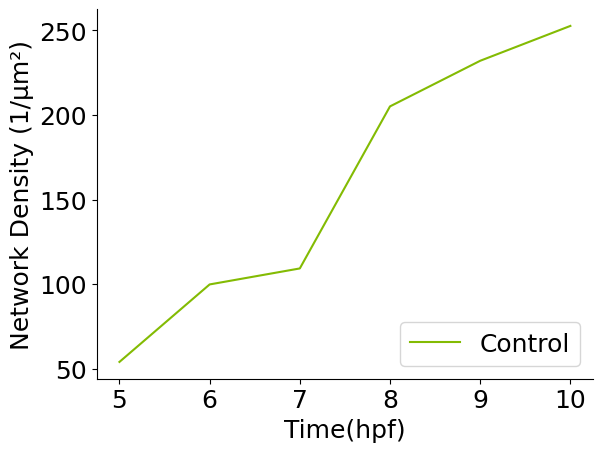

In [29]:
densityfile=glob.glob(folder_path+'/*.csv')
denseDf=pd.read_csv(densityfile[0],sep=',',header=0)
plt.ylabel('Network Density (1/μm²)')
plt.xlabel('Time(hpf)')
plt.plot(denseDf[' '][:]+4,denseDf['Mean'][:],color='#83bb03',label=" 'Keratin Network density' ")
plt.rcParams['font.size'] = 18
plt.legend(['Control', "Mosaic"],loc='lower right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(folder_path+"/NetworkDensity_Control.svg",dpi=300, format="svg",bbox_inches='tight')
plt.savefig(folder_path+"/NetworkDnsity_Control.png",dpi=300, format="png",bbox_inches='tight')


In [11]:
velocityfile=glob(folder_path+"/*vel*.xlsx")
veldf=pd.read_excel(velocityfile[0])

NameError: name 'folder_path' is not defined

In [3]:
veldf

NameError: name 'veldf' is not defined

NameError: name 'veldf' is not defined

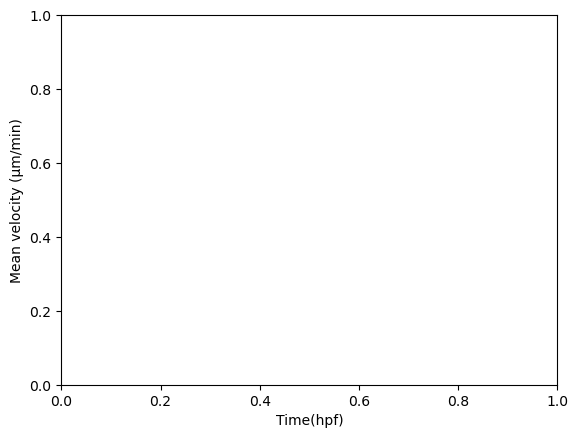

In [4]:
plt.ylabel('Mean velocity (μm/min)')
plt.xlabel('Time(hpf)')
plt.plot(veldf['Time (hpf).1'][:],veldf['vControl.1'][:],color='#83bb03',label=" 'Control' ")
plt.plot(veldf['Time (hpf).1'][:],veldf['vMosaic.1'][:],color='#83bb03',label=" 'Mosaic' ")
plt.legend(['Control', "Mosaic"],loc='upper right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(folder_path+"/EpiSpeed29032023_K4k8Mosaic.svg",dpi=300, format="svg",bbox_inches='tight')
plt.savefig(folder_path+"/EpiSpeed29032023_K4k8Mosaic.png",dpi=300, format="png",bbox_inches='tight')


In [5]:
plt.rcParams['font.size'] = 18

In [6]:
# mean_values = veldf[['vPos001', 'vPos002']].mean(axis=1)
sem_values = veldf[['vPos001', 'vPos002']].sem(axis=1)
mean_values = veldf[['vPos001', 'vPos002']].mean(axis=1)
meanMO_value=veldf[['vPos003','vPos004','vPos005']].mean(axis=1)
semMO_values=veldf[['vPos003','vPos004','vPos005']].sem(axis=1)

plt.ylabel('Mean EVL velocity (μm/min)')
plt.xlabel('Time (hours) post epiboly')
plt.rcParams['font.size'] = 18
plt.plot(veldf['Time(hpf)'][:25],mean_values[:25],color='#83bb03',label="Std Control")
plt.plot(veldf['Time(hpf)'][:44],meanMO_value[:44],color='#83bb03',label="K4K8 one cell MO")
plt.fill_between(veldf["Time(hpf)"],mean_values-sem_values,mean_values+sem_values,alpha=0.3,color='#83bb03')
plt.fill_between(veldf["Time(hpf)"],meanMO_value-semMO_values,meanMO_value+semMO_values,alpha=0.3,color='#06f8c9')
# Adding a legend
plt.legend(['Control YSL MO', "K4K8 YSL MO"],loc='upper right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(folder_path+"/EpiSpeed19012023_K4k8MO.svg",dpi=300, format="svg",bbox_inches='tight')
plt.savefig(folder_path+"/EpiSpeed19012023_K4k8MO.png",dpi=300, format="png",bbox_inches='tight')


NameError: name 'veldf' is not defined

In [61]:
# Define the bin size for time
bin_size = 0.5  # Example: Bin size of 0.5

# Group the velocity columns based on time bins and calculate the mean
binned_data = veldf.groupby(pd.cut(veldf['Time (hpf)'], bins=int(veldf['Time(hpf)'].max() // bin_size))).mean()

# mean_values = veldf[['vPos001', 'vPos002']].mean(axis=1)
sem_values = binned_data[['vPos001', 'vPos002']].sem(axis=1)
mean_values = binned_data[['vPos001', 'vPos002']].mean(axis=1)
meanMO_value= binned_data[['vPos003','vPos004']].mean(axis=1)
semMO_values= binned_data[['vPos003','vPos004']].sem(axis=1)

# Plot the binned data
plt.figure(figsize=(10, 6))
# Adding a legend
plt.legend(['Slc45 mutant', "K4K8 F0 mutant"])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Mean velocity (μm/min)')
plt.xlabel('Time(hpf)')
plt.rcParams['font.size'] = 16
plt.plot(binned_data['Time(hpf)'][:16],mean_values[:16],color='#83bb03',label="Std Control")
plt.plot(binned_data['Time(hpf)'][:29],meanMO_value[:29],color='#06f8c9',label="K4K8 one cell MO")
plt.fill_between(binned_data["Time(hpf)"],mean_values-sem_values,mean_values+sem_values,alpha=0.3,color='#83bb03')
plt.fill_between(binned_data["Time(hpf)"],meanMO_value-semMO_values,meanMO_value+semMO_values,alpha=0.3,color='#06f8c9')
# Adding a legend
plt.legend(['Std Control', "K4K8 one cell MO"])

plt.show()

KeyError: 'Time(hpf)'

In [ ]:
#Todo: Redoing the speed code for the carhoA and Mypt experiments 

#1 write a function to calculate speed from the excel files in different folders for the experiments and export the binned speed and time as csv files based on the bins used for mutant
#and MO experiments
#2. write a function to plot the binned speed and time for the different experiments
#3. plot the binned speed and time for the different experiments

In [5]:
#write a class object which has the functions speedcsv and binnedspeed which can be used to process Epispeed data from different experiments
#and plot the binned speed and time for the different experiments
#importing the control speed data from the output folder and making a dataframe

class SpeedProcessor:
    def __init__(self, time):
        self.time = time
    
    def speedcsv(self, folder_path):
        velocityfile = glob(folder_path + "\\*EpiSpeed*.csv")[0]
        dataDf = pd.read_csv(velocityfile, sep=',', header=0)
        veldf = pd.DataFrame(columns=["Time (hpf)", "velocity (μm/min)"])
        veldf["Time (hpf)"] = [self.time * (x - 1) / 3600 + 4 for x in dataDf[" "][1:]]
        pos = velocityfile[velocityfile.find("Pos"):+velocityfile.find("Pos") + 6]
        diff_list = dataDf['Length'].diff().tolist()
        diff_list = [abs(x / self.time * 60) for x in diff_list[1:]]
        veldf["velocity (μm/min)"] = diff_list
        veldf.to_csv(folder_path + "\\RawVel_Results_velocity_" + pos + ".csv", index=False, mode='w')
        return veldf
    
    def binnedspeed(self, veldf):
        binned_data = pd.DataFrame(columns=["Time (hpf)", "Mean vel"])
        bin_edges = np.arange(4, 10.7, 0.5)
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
        bin_averages = np.zeros(len(bin_centers))
        for i in range(len(bin_centers)):
            bin_averages[i] = np.mean(veldf["velocity (μm/min)"][(veldf["Time (hpf)"] >= bin_edges[i]) & (veldf["Time (hpf)"] < bin_edges[i + 1])])
        binned_data["Time (hpf)"] = bin_centers
        binned_data["Mean vel"] = bin_averages
        return binned_data
#To be worked on!
# Example usage
myptime = 825.08
file_paths = ["path/to/file1", "path/to/file2", "path/to/file3"]

speed_processor = SpeedProcessor(time)

dict = {}
for file_path in file_paths:
    veldf = speed_processor.speedcsv(file_path)
    dict[file_path] = speed_processor.binnedspeed(veldf)
    veldf.to_csv(file_path + "\\velocity.csv", index=False)
    dict[file_path].to_csv(file_path + "\\binned_speed.csv", index=False)


NameError: name 'time' is not defined

In [12]:
def speedcsv(folder_path,time):
    velocityfile=glob(folder_path+"\\*EpiSpeed*.csv")[0]
    dataDf=pd.read_csv(velocityfile,sep=',',header=0)
    veldf=pd.DataFrame(columns=["Time (hpf)","velocity (μm/min)"])
    veldf["Time (hpf)"]=[time*(x -1)/3600 + 4 for x in dataDf[" "][1:]]
    pos=velocityfile[velocityfile.find("Pos"):+velocityfile.find("Pos")+6]
    # Calculate the difference between consecutive elements in the column
    diff_list = dataDf['Length'].diff().tolist()

    # The first element in the diff_list will be NaN since there is no previous element to subtract from
    # You can remove the NaN value if needed
    diff_list = [abs(x/time*60) for x in diff_list[1:]]
    
    veldf["velocity (μm/min)"]=diff_list
    veldf.to_csv(folder_path+"\\RawVel_Results_velocity_"+pos+".csv",index=False,mode='w')
    return veldf

def speedcsvfile(file,time,outputfolder):

    dataDf=pd.read_csv(file,sep=',',header=0)
    veldf=pd.DataFrame(columns=["Time (hpf)","velocity (μm/min)"])
    veldf["Time (hpf)"]=[time*(x -1)/3600 + 4 for x in dataDf[" "][1:]]
    pos=file[file.find("Pos"):+file.find("Pos")+6]
    # Calculate the difference between consecutive elements in the column
    diff_list = dataDf['Length'].diff().tolist()

    # The first element in the diff_list will be NaN since there is no previous element to subtract from
    # You can remove the NaN value if needed
    diff_list = [abs(x/time*60) for x in diff_list[1:]]
    
    veldf["velocity (μm/min)"]=diff_list
    veldf.to_csv(outputfolder+"\\RawVel_Results_velocity_"+pos+".csv",index=False,mode='w')
    return veldf

def binnedspeed(veldf):
    binned_data=pd.DataFrame(columns=["Time (hpf)","Mean vel"])
    # Define the bin size for time
    bin_edges= np.arange(4,10.7,0.5)
    # Compute the bin averages
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    # Group the velocity columns based on time bins and calculate the mean
    #binned_data = veldf.groupby(pd.cut(veldf['Time (hpf)'], bins=int(veldf['Time(hpf)'].max() // bin_size))).mean()
    #binned_data["Cut Vel"] = veldf.groupby(pd.cut(veldf['Time (hpf)'], bins=bin_edges)).mean()
    bin_averages = np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        bin_averages[i]=np.mean(veldf["velocity (μm/min)"][(veldf["Time (hpf)"]>=bin_edges[i]) & (veldf["Time (hpf)"]<bin_edges[i+1])])
    binned_data["Time (hpf)"]=bin_centers
    binned_data["Mean vel"]=bin_averages
    return binned_data

myptfolder=[x for x in glob("H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\02_Feb\\15022023_MyptYSLinj\\Pos*") if glob(x+"\\*EpiSpeed*.csv")!=[]]
caRhoAfolder1=[x for x in glob("H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\10_Oct\\30102023_CaRhoAgood\\Pos*") if glob(x+"\\*EpiSpeed*.csv")!=[]]
caRhoAfolder2=[x for x in glob("H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\10_Oct\\24102023\\Pos*") if glob(x+"\\*EpiSpeed*.csv")!=[]]
folders=[myptfolder,caRhoAfolder1,caRhoAfolder2]
dict={}
for folder in folders:
    for file in myptfolder:
        myptpd=speedcsv(file,825.08)
        dict["mypt_15022023_"+file[-6:]]=binnedspeed(myptpd)
    for file in caRhoAfolder1:
        carhpd1=speedcsv(file,746.67)
        dict["carhoA_30102023_"+file[-6:]]=binnedspeed(carhpd1)
    for file in caRhoAfolder2:
        carhpd2=speedcsv(file,821.20)
        dict["carhoA2_241012023_"+file[-6:]]=binnedspeed(carhpd2)
                
dict

{'mypt_15022023_Pos005':     Time (hpf)  Mean vel
 0         4.25  1.049244
 1         4.75  0.920129
 2         5.25  0.638411
 3         5.75  0.979578
 4         6.25  1.144798
 5         6.75  1.980487
 6         7.25  0.541038
 7         7.75  1.455132
 8         8.25       NaN
 9         8.75       NaN
 10        9.25       NaN
 11        9.75       NaN
 12       10.25       NaN,
 'mypt_15022023_Pos002':     Time (hpf)  Mean vel
 0         4.25  1.413608
 1         4.75  0.949253
 2         5.25  1.477457
 3         5.75  1.144544
 4         6.25  1.654749
 5         6.75  1.809594
 6         7.25  1.585192
 7         7.75       NaN
 8         8.25       NaN
 9         8.75       NaN
 10        9.25       NaN
 11        9.75       NaN
 12       10.25       NaN,
 'mypt_15022023_Pos001':     Time (hpf)  Mean vel
 0         4.25  0.646810
 1         4.75  0.708004
 2         5.25  0.664808
 3         5.75  0.990159
 4         6.25  1.099821
 5         6.75  1.290905
 6         7.25 

In [14]:
#importing the control speed data from the output folder and making a dataframe
outputfolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\SpeedData\\"
speedpd=pd.read_csv(outputfolder+"controlSpeed.csv",sep=',',header=0)
speedpd=speedpd.drop(columns=["Unnamed: 0"],inplace=False)
#speedpd=pd.DataFrame()
speedpd["Time (hpf)"]=dict["mypt_15022023_Pos001"]["Time (hpf)"]
for key in dict.keys():
    speedpd[key]=dict[key]["Mean vel"]
speedpd.to_csv(outputfolder+"SpeedData.csv",index=False)

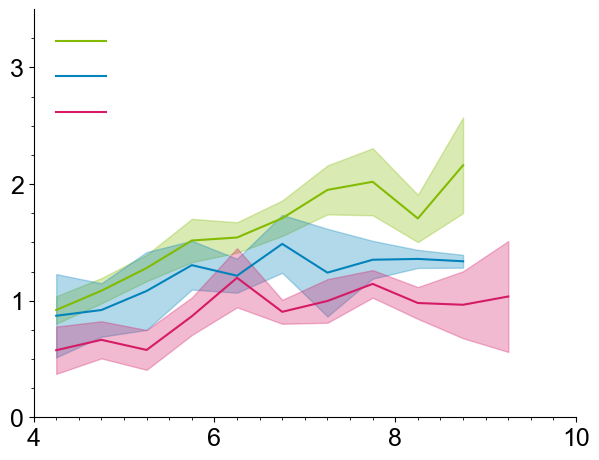

In [ ]:

# This cell calculates the mean and standard error of the mean (SEM) for the control and experiment speed data.
# It then plots the speed data for the control and experiments, along with the mean velocity for each experiment.

# List of column names for the control speed data
controlcolumns=[ 'carhoA_30102023_Pos001', 'mypt_15022023_Pos001','mypt_15022023_Pos002','control_210323_vPos001', 'control_210323_vPos002','control_1901vPos001', 'control_1901vPos002']#'control_210323_vPos001', 'control_210323_vPos002','control_1901vPos001', 'control_1901vPos002'

# List of column names for the experiment speed data
myptcolumns=[ 'mypt_15022023_Pos003', 'mypt_15022023_Pos004','mypt_15022023_Pos005']
caRhoAcolumns=['carhoA_30102023_Pos004', 'carhoA_30102023_Pos005','carhoA2_241012023_Pos003', 'carhoA2_241012023_Pos004','carhoA2_241012023_Pos005']

# Calculate the mean and SEM for the control speed data
controlmean=speedpd[controlcolumns].mean(axis=1)
controlsem=speedpd[controlcolumns].sem(axis=1)

# Calculate the mean and SEM for the experiment speed data
myptmean=speedpd[myptcolumns].mean(axis=1)
myptsem=speedpd[myptcolumns].sem(axis=1)
caRhoAmean=speedpd[caRhoAcolumns].mean(axis=1)
caRhoAsem=speedpd[caRhoAcolumns].sem(axis=1)

# Plot the speed data for the control and experiments
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#ax.set_ylabel("EVL speed (μm/min)")
ax.set_xlim([4,10])
ax.xaxis.set_ticks(np.arange(4, 10, 0.25),minor=True)
ax.set_xlim([4,])
ax.set_ylim(0,3.5)
ax.set_yticks(np.arange(0,3.5,0.25),minor=True)

# Plot the mean control speed data and fill the area between the mean and SEM
ax.plot(speedpd["Time (hpf)"][:-3],controlmean[:-3],color='#83bb03',label=" ")
ax.fill_between(speedpd["Time (hpf)"],controlmean-controlsem,controlmean+controlsem,alpha=0.3,color='#83bb03')

ax.plot(speedpd["Time (hpf)"][:-3],myptmean[:-3],color='#0383bb',label=" ")
ax.fill_between(speedpd["Time (hpf)"],myptmean-myptsem,myptmean+myptsem,alpha=0.3,color='#0383bb')

ax.plot(speedpd["Time (hpf)"][:-2],caRhoAmean[:-2],color="#D51B66",label=" ")
ax.fill_between(speedpd["Time (hpf)"],caRhoAmean-caRhoAsem,caRhoAmean+caRhoAsem,alpha=0.3,color="#D51B66")
plt.legend(loc="upper left",frameon=False,fontsize=18)
# Set the labels and title
#plt.xlabel('Time (hpf)')
#plt.ylabel('Mean Velocity (μm/min)')
plt.savefig(outputfolder+"SpeedPlot_nolab.svg",dpi=300,transparent=True, format="svg",bbox_inches='tight')
plt.savefig(outputfolder+"SpeedPlot_nolab.png",dpi=300,transparent=True, format="png",bbox_inches='tight')
plt.savefig(outputfolder+"SpeedPlot_nolab.pdf",dpi=300,transparent=True, format="pdf",bbox_inches='tight')


# Show the plot
plt.show()


In [17]:
dict.keys()

dict_keys(['mypt_Pos001', 'mypt_Pos002', 'mypt_Pos003', 'mypt_Pos004', 'mypt_Pos005', 'carhoA1_Pos001', 'carhoA1_Pos004', 'carhoA1_Pos005', 'carhoA2_Pos003', 'carhoA2_Pos004', 'carhoA2_Pos005'])

In [4]:
yslfolder= "H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\03_Mar\\08032023_K4K8Yslinj\\N2Vprocessedfiles\\Epispeed_08032023_K4K8Yslinj\\" 
outputfolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure3\\KeratinMorphantSpeed\\"
controlfiles=["Pos001","Pos002"]
dict={}
yslcsv=[x for x in glob(yslfolder+"*.csv") if x[-10:-4] not in controlfiles]
controlcsv=[x for x in glob(yslfolder+"*.csv") if x[-10:-4] in controlfiles]
for file in controlcsv:
    controlpd=speedcsvfile(file,731.97,outputfolder)
    dict["control_08032023_"+file[-10:-4]]=binnedspeed(controlpd)
for file in yslcsv:
    yslpd=speedcsvfile(file,731.97,outputfolder)
    dict["ysl_08032023_"+file[-10:-4]]=binnedspeed(yslpd)


NameError: name 'speedcsvfile' is not defined

In [5]:
controlyslcolumns=[]
yslcolumns=[]
yslspeedpd=pd.DataFrame()
yslspeedpd["Time (hpf)"]=dict["control_08032023_Pos001"]["Time (hpf)"]
for key in dict.keys():
    yslspeedpd[key]=dict[key]["Mean vel"]
    if "control" in key:
        controlyslcolumns.append(key)
    else:
        yslcolumns.append(key)
controlyslmean=yslspeedpd[controlyslcolumns].mean(axis=1)
controlyslsem=yslspeedpd[controlyslcolumns].sem(axis=1)
yslmean=yslspeedpd[yslcolumns].mean(axis=1)
yslsem=yslspeedpd[yslcolumns].sem(axis=1)
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#ax.set_xlabel("Time (hpf)")
#ax.set_ylabel("EVL speed (μm/min)")
ax.set_xlim([4,10.5])
ax.xaxis.set_ticks(np.arange(4, 11, 0.25),minor=True)
ax.set_ylim(0,2.5)
ax.set_yticks(np.arange(0,2.75,0.25),minor=True)
ax.plot(yslspeedpd["Time (hpf)"][:-2],controlyslmean[:-2],color='#83bb03',label="Control")
ax.fill_between(yslspeedpd["Time (hpf)"],controlyslmean-controlyslsem,controlyslmean+controlyslsem,alpha=0.3,color='#83bb03')
ax.plot(yslspeedpd["Time (hpf)"],yslmean,color='#BB9703',label="K4K8 YSL MO")
ax.fill_between(yslspeedpd["Time (hpf)"],yslmean-yslsem,yslmean+yslsem,alpha=0.3,color='#BB9703')
plt.legend(loc="best",frameon=False,fontsize=18)
yslspeedpd.to_csv(outputfolder+"YSLK4K8MOSpeedData.csv",index=False)
plt.savefig(outputfolder+"YSLK4K8MOSpeedPlot.svg",dpi=300, format="svg",bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"YSLK4K8MOSpeedPlot.png",dpi=300, format="png",bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"YSLK4K8MOSpeedPlot.pdf",dpi=300, format="pdf",bbox_inches='tight',transparent=True)

KeyError: 'control_08032023_Pos001'

In [34]:
dict

{'control_08032023_01.csv':     Time (hpf)  Mean vel
 0         4.25  0.336325
 1         4.75  0.204312
 2         5.25  0.225692
 3         5.75  0.237879
 4         6.25  0.535541
 5         6.75  0.917579
 6         7.25  1.155922
 7         7.75  1.558138
 8         8.25  1.384893
 9         8.75  1.106152
 10        9.25  2.002541
 11        9.75  1.768351
 12       10.25  2.443502,
 'control_08032023_02.csv':     Time (hpf)  Mean vel
 0         4.25  0.417599
 1         4.75  0.052748
 2         5.25  0.519202
 3         5.75  0.932702
 4         6.25  0.873506
 5         6.75  1.044100
 6         7.25  1.450442
 7         7.75  1.558384
 8         8.25  1.404047
 9         8.75  1.666954
 10        9.25  1.823517
 11        9.75       NaN
 12       10.25       NaN,
 'ysl_08032023_03.csv':     Time (hpf)  Mean vel
 0         4.25  0.169228
 1         4.75  0.152957
 2         5.25  0.431275
 3         5.75  0.403541
 4         6.25  1.053213
 5         6.75  0.791098
 6         

In [40]:
dnkrt18speedpd[dnkrt18columns].sem(axis=1)

0    1.216586
1    1.208813
2    0.970801
3    0.997384
4    0.883177
5    1.180589
6    1.362699
7    1.193830
8    1.663082
dtype: float64

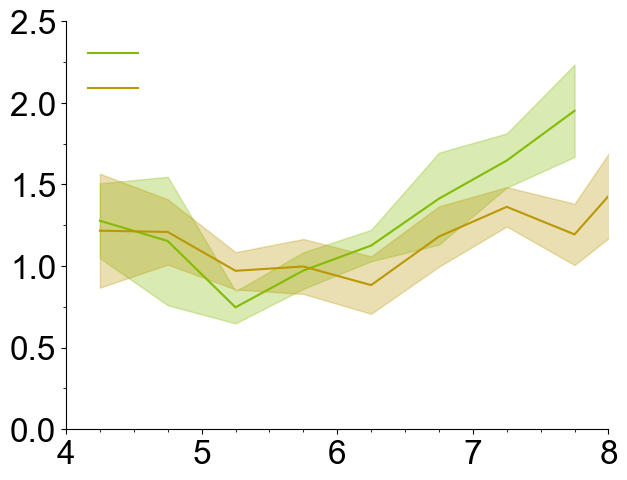

In [7]:
#Figure supplement 3
#dnKrt18 speed data
dnkrt18folder=f"H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2020/07_July/28072020_Krt18DN"
outputfolder="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinMorphantSpeed/"
dnfiles=[x for x in glob(dnkrt18folder+"/*/*.csv") if "Pos" in x]
controlindex=["Pos004","Pos005","Pos006"]
dnkrt18dict={}
for file in dnfiles:
    dnkrt18pd=speedcsvfile(file,1097.3,outputfolder)
    pos=file[file.find("Pos"):+file.find("Pos")+6]
    if pos in controlindex:
        dnkrt18dict["control_28072020_"+pos]=binnedspeed(dnkrt18pd)
    else:
        dnkrt18dict["dnKrt18_28072020_"+pos]=binnedspeed(dnkrt18pd)
dnkrt18speedpd=pd.DataFrame()
dnkrt18speedpd["Time (hpf)"]=dnkrt18dict["control_28072020_Pos004"]["Time (hpf)"]
for key in dnkrt18dict.keys():
    dnkrt18speedpd[key]=dnkrt18dict[key]["Mean vel"]
dnkrt18speedpd.drop([9,10,11,12],inplace=True)
controldnkrt18columns=[x for x in dnkrt18speedpd.columns if "control" in x]
dnkrt18columns=[x for x in dnkrt18speedpd.columns if "dnKrt18" in x]
controldnkrt18mean=dnkrt18speedpd[controldnkrt18columns].mean(axis=1)
controldnkrt18sem=dnkrt18speedpd[controldnkrt18columns].sem(axis=1)
dnkrt18mean=dnkrt18speedpd[dnkrt18columns].mean(axis=1)
dnkrt18sem=dnkrt18speedpd[dnkrt18columns].sem(axis=1)
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#ax.set_xlabel("Time (hpf)")
#ax.set_ylabel("EVL speed (μm/min)")
ax.set_xlim([4,8])
ax.xaxis.set_ticks(np.arange(4, 8, 0.25),minor=True)
ax.set_ylim(0.5,2.5)
ax.set_yticks(np.arange(0,2.75,0.25),minor=True)
ax.plot(dnkrt18speedpd["Time (hpf)"][:-1],controldnkrt18mean[:-1],color='#83bb03',label=" ")
ax.fill_between(dnkrt18speedpd["Time (hpf)"],controldnkrt18mean-controldnkrt18sem,controldnkrt18mean+controldnkrt18sem,alpha=0.3,color='#83bb03')
ax.plot(dnkrt18speedpd["Time (hpf)"],dnkrt18mean,color='#BB9703',label=" ")
ax.fill_between(dnkrt18speedpd["Time (hpf)"],dnkrt18mean-dnkrt18sem,dnkrt18mean+dnkrt18sem,alpha=0.3,color='#BB9703')
plt.legend(loc="best",frameon=False,fontsize=18)
dnkrt18speedpd.to_csv(outputfolder+"dnKrt18SpeedData.csv",index=False)
plt.savefig(outputfolder+"dnKrt18SpeedPlot.svg",dpi=300, format="svg",bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"dnKrt18SpeedPlot.png",dpi=300, format="png",bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"dnKrt18SpeedPlot.pdf",dpi=300, format="pdf",bbox_inches='tight',transparent=True)
plt.show()




In [18]:

data=pd.read_csv(dnfiles[0],sep=',',header=0)
veldf=pd.DataFrame(columns=["Time (hpf)","velocity (μm/min)"])
veldf["Time (hpf)"]=[1097.3*(x -1)/3600 + 4 for x in data[" "][1:]]
pos=dnfiles[0][dnfiles[0].find("Pos"):+dnfiles[0].find("Pos")+6]
# Calculate the difference between consecutive elements in the column
diff_list = data['Length'].diff().tolist()

# The first element in the diff_list will be NaN since there is no previous element to subtract from
# You can remove the NaN value if needed
diff_list = [abs(x/1097.3*60) for x in diff_list[1:]]

veldf["velocity (μm/min)"]=diff_list



'Pos001'

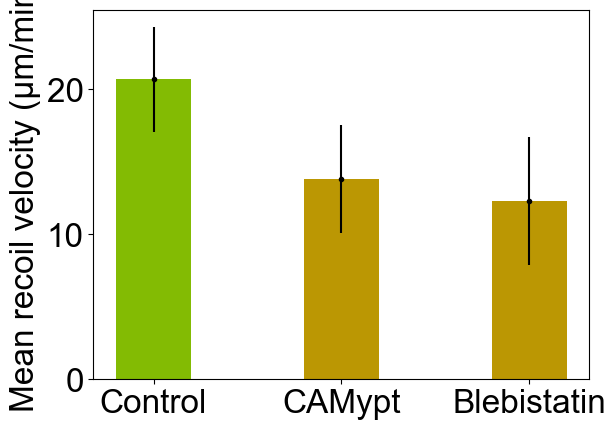

In [32]:
plt.ylabel("Mean recoil velocity (μm/min)")
plt.bar(['Control','CAMypt','Blebistatin'],[20.67,13.8,12.3],color=['#83bb03','#BB9703','#BB9703'],width = 0.4)
plt.errorbar(['Control','CAMypt','Blebistatin'],[20.67,13.8,12.3],yerr=[3.6,3.7,4.4],fmt=".",color='black')
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/MyptRecoil.pdf",transparent=True,dpi=300, format="pdf",bbox_inches='tight') 